# Pandas(3) 数据清洗、处理和透视表

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

## 1. 画图的美观性

做数据分析，图、表、文字是展示分析结果时使用的三种手段。其中，图最为直观，也是读者/观众最容易接收的信息。因此，图的**合理、准确、美观**是数据分析工作中最重要的部分之一。

比如在学术论文里，越是水平高的学术期刊，发表的论文里图就画的越漂亮。

该网站内有pandas.DataFrame.plot()所包含的所有可调参数，可以尝试使用

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

In [2]:
df=pd.read_excel('GDP.xlsx',index_col=0)
df.head()

,第三产业增加值,地区生产总值
北京市,24553.64,30319.98
天津市,11027.12,18809.64
河北省,16632.21,36010.27
山西省,8988.28,16818.11
内蒙古自治区,8728.10,17289.22


**数据分析第一步：画个图看看**

<AxesSubplot:>

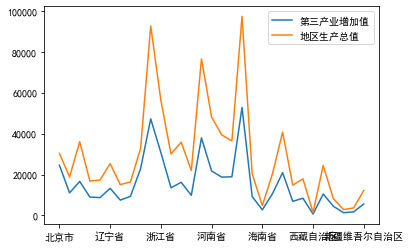

In [3]:
df.plot()

**数据分析第二步：尝试建立一些指标，并且画个图看看是否恰当**

In [4]:
df['第三产业对GDP贡献率']=df['第三产业增加值']/df['地区生产总值']
df.head()

,第三产业增加值,地区生产总值,第三产业对GDP贡献率
北京市,24553.64,30319.98,0.809817
天津市,11027.12,18809.64,0.586248
河北省,16632.21,36010.27,0.461874
山西省,8988.28,16818.11,0.534441
内蒙古自治区,8728.10,17289.22,0.504829


<AxesSubplot:>

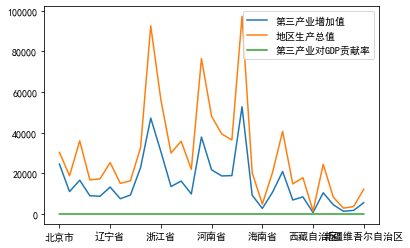

In [5]:
df.plot()

由于量级不同，因此需要分开画

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

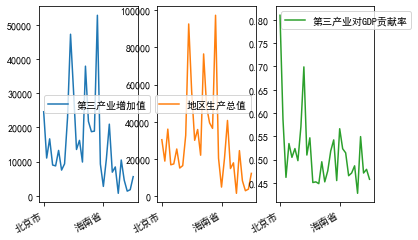

In [6]:
df.plot(subplots=True,layout=(1,3)) #dataframe.plot()可以添加layout参数来修改子图的布局

由于第三产业增加值、地区生产总值、第三产业对GDP贡献率三者是共线的，因此保留两个即可。

我们把GDP和贡献率画到一起。需要使用副坐标轴。

<AxesSubplot:>

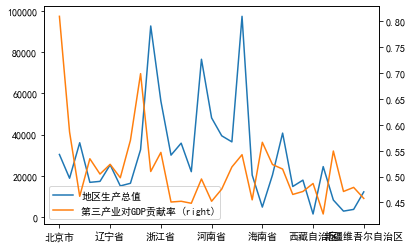

In [7]:
df[['地区生产总值','第三产业对GDP贡献率']].plot(secondary_y=['第三产业对GDP贡献率']) #dataframe也能画副坐标轴

matplotlib里提供了一些画图的style模板，通过plt.style.use()调用。可以很方便的使图变得好看，大家今后画图时可以尝试使用。

官方给出了所有模板的名称，可以自选使用：

https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html

示例：

In [8]:
plt.style.use('ggplot') #该命令需要用在新建画布和子图之前，才能生效

<AxesSubplot:>

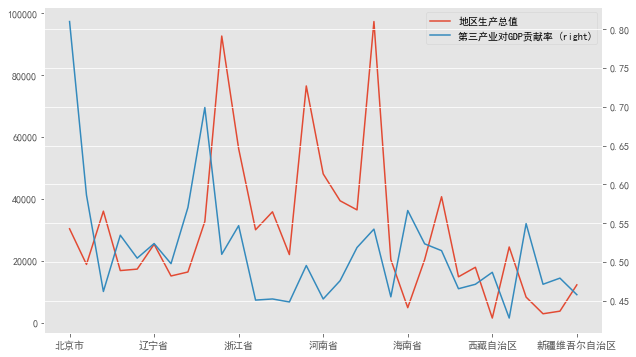

In [9]:
fig1,ax1=plt.subplots(figsize=(10,6))
df[['地区生产总值','第三产业对GDP贡献率']].plot(ax=ax1,secondary_y=['第三产业对GDP贡献率'])

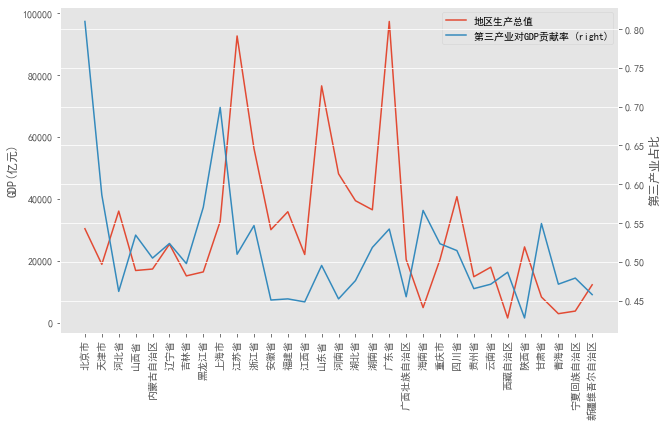

In [10]:
ax1.set_xticks(np.arange(len(df.index)))
ax1.set_xticklabels(df.index,rotation=90)
ax1.set_ylabel('GDP(亿元)')
ax1.right_ax.set_ylabel('第三产业占比')
fig1

此外，python还有很多作图包可以很简单的画出漂亮的图。如seaborn。https://seaborn.pydata.org/#

**本周附加作业：使用seaborn包绘制本周三作业中的图。(+3分，周三会提醒)**

## 2.基于数据透视表的数据分析

运用透视表功能进行分析 pandas.pivot_table()

案例：上节课用到的数据

In [13]:
gdpandpop=pd.read_excel('GDPandPopulation.xlsx')
gdpandpop.head()

,省份,GDP,POP,CapitalGDP,REGION
0,北京市,30319.98,2154,14.076128,华北
1,天津市,18809.64,1560,12.057462,华北
2,河北省,36010.27,7556,4.765785,华北
3,山西省,16818.11,3718,4.523429,华北
4,内蒙古自治区,17289.22,2534,6.822897,华北


In [14]:
gdpandpop.describe()

,GDP,POP,CapitalGDP
count,31.000000,31.000000,31.000000
mean,29506.692258,4504.935484,6.508875
std,23905.147349,2891.081054,2.914103
min,1477.630000,344.000000,3.127065
25%,15718.120000,2510.500000,4.737428
50%,21984.780000,3864.000000,5.279864
75%,36218.025000,6120.500000,7.217045
max,97277.770000,11346.000000,14.076128


按人口数量简单分类，以四分之一分位值分割，分为特大、大、中、小四档

In [15]:
#定义一个函数，用于判定人口规模
def popsize(x):
    if x>=6120.5:
        return '特大'
    elif x>=3864.0:
        return '大'
    elif x>=2510.5:
        return '中'
    else:
        return '小'

In [16]:
gdpandpop['人口规模']=gdpandpop['POP'].apply(popsize)

,省份,GDP,POP,CapitalGDP,REGION,人口规模
0,北京市,30319.98,2154,14.076128,华北,小
1,天津市,18809.64,1560,12.057462,华北,小
2,河北省,36010.27,7556,4.765785,华北,特大
3,山西省,16818.11,3718,4.523429,华北,中
4,内蒙古自治区,17289.22,2534,6.822897,华北,中


In [17]:
gdpandpop

,省份,GDP,POP,CapitalGDP,REGION,人口规模
0,北京市,30319.98,2154,14.076128,华北,小
1,天津市,18809.64,1560,12.057462,华北,小
2,河北省,36010.27,7556,4.765785,华北,特大
3,山西省,16818.11,3718,4.523429,华北,中
4,内蒙古自治区,17289.22,2534,6.822897,华北,中
5,辽宁省,25315.35,4359,5.807605,东北,大
6,吉林省,15074.62,2704,5.574933,东北,中
7,黑龙江省,16361.62,3773,4.336501,东北,中
8,上海市,32679.87,2424,13.481795,华东,小
9,江苏省,92595.40,8051,11.501105,华东,特大


In [18]:
pt1=pd.pivot_table(gdpandpop,values='CapitalGDP',index='REGION',aggfunc=np.mean)  
#默认的聚合函数为求均值，aggfunc=np.mean可以省略，不影响结果
pt1

,CapitalGDP
REGION,
东北,5.239680
中南,5.802517
华东,8.707075
华北,8.449140
西北,4.898776
西南,4.710372


In [19]:
pt2=pd.pivot_table(gdpandpop,values='CapitalGDP',index='REGION',columns='人口规模',aggfunc=np.mean)
pt2

人口规模,中,大,小,特大
REGION,,,,
东北,4.955717,5.807605,NaN,NaN
中南,NaN,5.392389,5.173501,6.285609
华东,NaN,7.870174,13.481795,7.952404
华北,5.673163,NaN,13.066795,4.765785
西北,3.127065,6.324617,5.014067,NaN
西南,5.338719,3.702095,4.295436,4.876889


透视表有一个重要功能,通过margins=True开启边缘值计算。

In [20]:
pt3=pd.pivot_table(gdpandpop,values='CapitalGDP',index='REGION',columns='人口规模',aggfunc=np.mean,margins=True)
pt3

人口规模,中,大,小,特大,All
REGION,,,,,
东北,4.955717,5.807605,NaN,NaN,5.239680
中南,NaN,5.392389,5.173501,6.285609,5.802517
华东,NaN,7.870174,13.481795,7.952404,8.707075
华北,5.673163,NaN,13.066795,4.765785,8.449140
西北,3.127065,6.324617,5.014067,NaN,4.898776
西南,5.338719,3.702095,4.295436,4.876889,4.710372
All,5.008895,6.278702,8.015815,6.544589,6.508875


#### 来比较一下透视表和上节课所学的groupby之间的差异

In [21]:
gb=gdpandpop.groupby(by=['REGION','人口规模'])['CapitalGDP'].apply(np.mean)
gb

REGION  人口规模
东北      中        4.955717
        大        5.807605
中南      大        5.392389
        小        5.173501
        特大       6.285609
华东      大        7.870174
        小       13.481795
        特大       7.952404
华北      中        5.673163
        小       13.066795
        特大       4.765785
西北      中        3.127065
        大        6.324617
        小        5.014067
西南      中        5.338719
        大        3.702095
        小        4.295436
        特大       4.876889
Name: CapitalGDP, dtype: float64

<class 'numpy.ndarray'>
(2,)


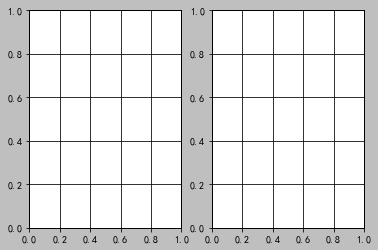

In [22]:
plt.style.use('grayscale')
fig,axes=plt.subplots(1,2)  #这样生成的axes是多个子图构成的数组,调用时要以axes[0],axes[1]这样的形式调用每个子图对象
print(type(axes))
print(axes.shape)

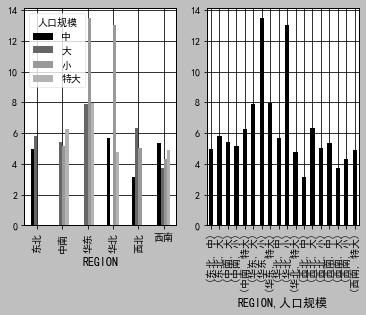

In [23]:
pt2.plot.bar(ax=axes[0])
gb.plot.bar(ax=axes[1])
fig

两者在数据的统计、聚合功能上没有显著区别.但在显示模式（包括直观显示和默认画图）上的差别，数据透视表在显示上更友好一些。

这也是由他们生成的DataFrame的维度决定的，数据透视表通过values这个属性降低了一个维度（行名+列名的总数要比对应的groupby方法少一个）。

#### P.S. 有一种特殊的专用于计算频数的透视表，叫做交叉表pandas.crosstab()

使用pivot_table的实现方式，可以使用python自带的len()函数来计数。

In [24]:
pt4=pd.pivot_table(gdpandpop,values='CapitalGDP',index='REGION',columns='人口规模',aggfunc=len)
pt4

人口规模,中,大,小,特大
REGION,,,,
东北,2.0,1.0,NaN,NaN
中南,NaN,2.0,1.0,3.0
华东,NaN,3.0,1.0,3.0
华北,2.0,NaN,2.0,1.0
西北,1.0,1.0,3.0,NaN
西南,2.0,1.0,1.0,1.0


使用crosstab的实现方式，使用默认设置即可。相对简洁一些

In [25]:
ct=pd.crosstab(gdpandpop['REGION'],gdpandpop['人口规模'])
ct

人口规模,中,大,小,特大
REGION,,,,
东北,2,1,0,0
中南,0,2,1,3
华东,0,3,1,3
华北,2,0,2,1
西北,1,1,3,0
西南,2,1,1,1


## 3. 数据清洗和处理

### 3.1 清洗哪些数据？

- 缺失数据
- 重复值
- 异常值

将数据导入后，看元数据，包括字段解释、数据来源、代码表等等一切描述数据的信息；再抽取一部分数据，使用人工查看方式，对数据本身有一个直观的了解，并且初步发现一些问题，为之后的处理做准备。

### 3.2 处理步骤

案例：北京市提供新冠病毒核酸检测服务的医疗卫生机构数据表 数据来源：人口健康数据仓储

https://www.ncmi.cn/dataDetails/downloadBatch.html?data_set_id=2752&type=date_set&dataType=1

#### 3.2.1 缺失值
(1) 发现缺失值  `isnull` 和 `notnull`

In [26]:
data=pd.read_excel('data.xlsx')
data.head()

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
0,1,1,百世诺（北京）医学检验实验室,昌平区,北京市昌平区北大医疗产业园14号楼5层,18515066818；13426246807,是,否,否,否,是,是
1,13,3,首都医科大学附属北京地坛医院,朝阳区,北京市朝阳区京顺东街8号,NaN,NaN,NaN,京医通,NaN,是,是
2,2,2,北京吉因加医学检验实验室有限公司,昌平区,北京市昌平区北大医疗产业园2号楼5层,010-86486996,是,否,否,否,是,是
3,3,3,北京凯普医学检验实验室,昌平区,北京市昌平区中关村生命科学院北大医疗产业园15号楼,010-56918017；010-56918025；010-50981919,是,http://www.hbmlab.com/covid-19/show.php?lang=c...,凯普医检,否,是,是
4,4,4,北京积水潭医院（回龙观院区）,昌平区,北京市昌平区回龙观回南北路68号,010-58398684,是,否,否,否,是,是


In [27]:
data.isnull()

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
104,False,False,False,False,False,False,False,False,False,False,False,False
105,False,False,False,False,False,False,False,False,False,False,False,False
106,False,False,False,False,False,False,False,False,False,False,False,False
107,False,False,False,False,False,False,False,False,False,False,False,False


怎么知道到底哪有缺失值，哪没有？

In [28]:
data.isnull().agg(np.unique)

总序号              [False]
序号               [False]
机构名称             [False]
辖区               [False]
机构地址             [False]
联系电话       [False, True]
电话预约       [False, True]
网络预约       [False, True]
微信公众号预约    [False, True]
其他方式预约     [False, True]
接受团体检测     [False, True]
接受个人检测     [False, True]
dtype: object

In [30]:
data2=data.dropna(axis=0,subset=['联系电话'])  
#注意，dropna的subset只能接收列名/行的list，即使一列/行也要加方括号
len(data)-len(data2)

2

In [31]:
data2

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
0,1,1,百世诺（北京）医学检验实验室,昌平区,北京市昌平区北大医疗产业园14号楼5层,18515066818；13426246807,是,否,否,否,是,是
2,2,2,北京吉因加医学检验实验室有限公司,昌平区,北京市昌平区北大医疗产业园2号楼5层,010-86486996,是,否,否,否,是,是
3,3,3,北京凯普医学检验实验室,昌平区,北京市昌平区中关村生命科学院北大医疗产业园15号楼,010-56918017；010-56918025；010-50981919,是,http://www.hbmlab.com/covid-19/show.php?lang=c...,凯普医检,否,是,是
4,4,4,北京积水潭医院（回龙观院区）,昌平区,北京市昌平区回龙观回南北路68号,010-58398684,是,否,否,否,是,是
5,5,5,北京清华长庚医院,昌平区,北京市昌平区立汤路168号,010-56118899,是,http://reg.btch.edu.cn/web/hospitalpage；https:...,京医通,官方APP；自助服务机,是,是
...,...,...,...,...,...,...,...,...,...,...,...,...
103,101,10,北京市西城区疾病预防与控制中心,西城区,北京市西城区德外大街38号,010-82061846,是,否,否,否,是,否
104,102,1,北京市延庆区医院,延庆区,北京市延庆区东顺城街28号,010-69171077；010-69171099,是,否,延庆健康通；北京114预约挂号,否,是,是
105,103,2,北京市延庆区疾病预防控制中心,延庆区,北京市延庆区百泉路39号,010-69188100；010-69187731,是,否,否,否,是,否
106,87,5,北京市顺义区疾病预防控制中心,顺义区,北京市顺义区光明南街1号,010-69441026,是,否,否,否,是,否


**去除缺失值后之前的index保持不变！**

In [32]:
data2.head()

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
0,1,1,百世诺（北京）医学检验实验室,昌平区,北京市昌平区北大医疗产业园14号楼5层,18515066818；13426246807,是,否,否,否,是,是
2,2,2,北京吉因加医学检验实验室有限公司,昌平区,北京市昌平区北大医疗产业园2号楼5层,010-86486996,是,否,否,否,是,是
3,3,3,北京凯普医学检验实验室,昌平区,北京市昌平区中关村生命科学院北大医疗产业园15号楼,010-56918017；010-56918025；010-50981919,是,http://www.hbmlab.com/covid-19/show.php?lang=c...,凯普医检,否,是,是
4,4,4,北京积水潭医院（回龙观院区）,昌平区,北京市昌平区回龙观回南北路68号,010-58398684,是,否,否,否,是,是
5,5,5,北京清华长庚医院,昌平区,北京市昌平区立汤路168号,010-56118899,是,http://reg.btch.edu.cn/web/hospitalpage；https:...,京医通,官方APP；自助服务机,是,是


In [33]:
data2.isnull().agg(np.unique)

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
0,False,False,False,False,False,False,False,False,False,False,False,False


当都没有缺失值的时候，即缺失值处理完毕

#### 3.2.2去重

处理重复数据是经常遇到的问题，处理前需要分析重复数据的产生原因和去除后的影响。

常见是情况有两种：

1. 记录重复，即某些记录的值完全相同；
2. 特征重复，即虽然名称不同，但值完全相同。

In [34]:
len(data2)-len(data2['机构名称'].unique())

3

In [35]:
data3=data2.drop_duplicates(subset=data2.columns)  
#subset可以通过方括号同时接收多个列名,columns可以一下给出所有列

In [36]:
len(data2)-len(data3)

2

In [37]:
data4=data3.drop_duplicates(subset=['机构名称','辖区','机构地址','联系电话'])  

In [38]:
len(data3)-len(data4)

1

#### 3.2.3 异常值

异常值是指数据中个别值的数值明显偏离其余的数值，有时也称为离群点，检测异常值就是检验数据中是否有录入错误以及是否含有不合理的数据。

In [39]:
data4

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
0,1,1,百世诺（北京）医学检验实验室,昌平区,北京市昌平区北大医疗产业园14号楼5层,18515066818；13426246807,是,否,否,否,是,是
2,2,2,北京吉因加医学检验实验室有限公司,昌平区,北京市昌平区北大医疗产业园2号楼5层,010-86486996,是,否,否,否,是,是
3,3,3,北京凯普医学检验实验室,昌平区,北京市昌平区中关村生命科学院北大医疗产业园15号楼,010-56918017；010-56918025；010-50981919,是,http://www.hbmlab.com/covid-19/show.php?lang=c...,凯普医检,否,是,是
4,4,4,北京积水潭医院（回龙观院区）,昌平区,北京市昌平区回龙观回南北路68号,010-58398684,是,否,否,否,是,是
5,5,5,北京清华长庚医院,昌平区,北京市昌平区立汤路168号,010-56118899,是,http://reg.btch.edu.cn/web/hospitalpage；https:...,京医通,官方APP；自助服务机,是,是
...,...,...,...,...,...,...,...,...,...,...,...,...
101,99,8,中国医学科学院阜外医院,西城区,北京市西城区北礼士路167号,010-88322674,是,否,否,否,是,是
102,100,9,火箭军特色医学中心,西城区,北京市西城区新街口外大街16号院,010-66343295,是,否,否,否,是,是
103,101,10,北京市西城区疾病预防与控制中心,西城区,北京市西城区德外大街38号,010-82061846,是,否,否,否,是,否
104,102,1,北京市延庆区医院,延庆区,北京市延庆区东顺城街28号,010-69171077；010-69171099,是,否,延庆健康通；北京114预约挂号,否,是,是


总序号应该都在0-105之内，超出这个范围的就是异常值

In [40]:
data4['总序号'].between(0,105)

0      True
2      True
3      True
4      True
5      True
       ... 
101    True
102    True
103    True
104    True
105    True
Name: 总序号, Length: 104, dtype: bool

In [41]:
data4[data4['总序号'].between(0,105)]

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
0,1,1,百世诺（北京）医学检验实验室,昌平区,北京市昌平区北大医疗产业园14号楼5层,18515066818；13426246807,是,否,否,否,是,是
2,2,2,北京吉因加医学检验实验室有限公司,昌平区,北京市昌平区北大医疗产业园2号楼5层,010-86486996,是,否,否,否,是,是
3,3,3,北京凯普医学检验实验室,昌平区,北京市昌平区中关村生命科学院北大医疗产业园15号楼,010-56918017；010-56918025；010-50981919,是,http://www.hbmlab.com/covid-19/show.php?lang=c...,凯普医检,否,是,是
4,4,4,北京积水潭医院（回龙观院区）,昌平区,北京市昌平区回龙观回南北路68号,010-58398684,是,否,否,否,是,是
5,5,5,北京清华长庚医院,昌平区,北京市昌平区立汤路168号,010-56118899,是,http://reg.btch.edu.cn/web/hospitalpage；https:...,京医通,官方APP；自助服务机,是,是
...,...,...,...,...,...,...,...,...,...,...,...,...
101,99,8,中国医学科学院阜外医院,西城区,北京市西城区北礼士路167号,010-88322674,是,否,否,否,是,是
102,100,9,火箭军特色医学中心,西城区,北京市西城区新街口外大街16号院,010-66343295,是,否,否,否,是,是
103,101,10,北京市西城区疾病预防与控制中心,西城区,北京市西城区德外大街38号,010-82061846,是,否,否,否,是,否
104,102,1,北京市延庆区医院,延庆区,北京市延庆区东顺城街28号,010-69171077；010-69171099,是,否,延庆健康通；北京114预约挂号,否,是,是


可以对其进行求反，即所有的True变False，False变True，就能找出异常的值。求反的符号为 ~ 波浪线

In [42]:
data4[~data4['总序号'].between(0,105)]

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
91,-9803784,38983,uihdifhihishfi,aydiufh,ruihldhfudhvui,ioreifjiojfs,否,否,dfrgdfgdgfh,否,是,是


In [43]:
data5=data4.drop(axis=0,index=91)

In [44]:
data5

,总序号,序号,机构名称,辖区,机构地址,联系电话,电话预约,网络预约,微信公众号预约,其他方式预约,接受团体检测,接受个人检测
0,1,1,百世诺（北京）医学检验实验室,昌平区,北京市昌平区北大医疗产业园14号楼5层,18515066818；13426246807,是,否,否,否,是,是
2,2,2,北京吉因加医学检验实验室有限公司,昌平区,北京市昌平区北大医疗产业园2号楼5层,010-86486996,是,否,否,否,是,是
3,3,3,北京凯普医学检验实验室,昌平区,北京市昌平区中关村生命科学院北大医疗产业园15号楼,010-56918017；010-56918025；010-50981919,是,http://www.hbmlab.com/covid-19/show.php?lang=c...,凯普医检,否,是,是
4,4,4,北京积水潭医院（回龙观院区）,昌平区,北京市昌平区回龙观回南北路68号,010-58398684,是,否,否,否,是,是
5,5,5,北京清华长庚医院,昌平区,北京市昌平区立汤路168号,010-56118899,是,http://reg.btch.edu.cn/web/hospitalpage；https:...,京医通,官方APP；自助服务机,是,是
...,...,...,...,...,...,...,...,...,...,...,...,...
101,99,8,中国医学科学院阜外医院,西城区,北京市西城区北礼士路167号,010-88322674,是,否,否,否,是,是
102,100,9,火箭军特色医学中心,西城区,北京市西城区新街口外大街16号院,010-66343295,是,否,否,否,是,是
103,101,10,北京市西城区疾病预防与控制中心,西城区,北京市西城区德外大街38号,010-82061846,是,否,否,否,是,否
104,102,1,北京市延庆区医院,延庆区,北京市延庆区东顺城街28号,010-69171077；010-69171099,是,否,延庆健康通；北京114预约挂号,否,是,是


In [45]:
len(data4)-len(data5)

1

## 4. 数据清洗案例 - 月住宅投资额

In [46]:
houseinv=pd.read_excel('月住宅投资额.xlsx')
houseinv

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
0,2020,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,12,NaN,142.45,191.60,109.25,12.95,50.11,39.97,32.68,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019,11,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019,10,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2000,5,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
238,2000,4,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
239,2000,3,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59
240,2000,2,12.55,3.75,0.61,0.52,0.00,0.72,0.00,0.25,...,6.08,6.01,1.63,4.92,0.00,1.73,0.02,0.00,0.00,0.00


### 4.1 去除缺失行

In [47]:
houseinv1=houseinv.dropna(axis=0,how='all',subset=['北京市','天津市','河北省']) #都为空时删除行
houseinv1

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,2019,12,NaN,142.45,191.60,109.25,12.95,50.11,39.97,32.68,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019,11,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019,10,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
5,2019,9,206.05,237.32,347.07,133.73,135.73,265.94,132.02,123.92,...,359.03,468.02,186.86,322.51,11.68,354.99,132.00,28.19,41.60,107.08
6,2019,8,173.17,157.91,332.31,124.50,111.02,207.80,138.65,75.08,...,288.46,426.79,214.50,289.73,10.07,258.98,95.24,27.24,32.67,94.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2000,6,22.04,8.71,9.96,4.95,3.35,20.56,7.58,10.10,...,7.15,10.68,3.25,3.57,0.00,4.67,2.48,0.80,1.23,5.29
237,2000,5,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
238,2000,4,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
239,2000,3,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59


### 4.2 查找缺失值

In [48]:
houseinv1.isnull()

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
houseinv1.isnull().agg(np.unique)

年                 [False]
月                 [False]
北京市         [False, True]
天津市         [False, True]
河北省               [False]
山西省               [False]
内蒙古自治区            [False]
辽宁省               [False]
吉林省               [False]
黑龙江省              [False]
上海市               [False]
江苏省               [False]
浙江省               [False]
安徽省               [False]
福建省               [False]
江西省               [False]
山东省               [False]
河南省               [False]
湖北省               [False]
湖南省               [False]
广东省               [False]
广西壮族自治区           [False]
海南省               [False]
重庆市               [False]
四川省               [False]
贵州省               [False]
云南省               [False]
西藏自治区             [False]
陕西省               [False]
甘肃省               [False]
青海省               [False]
宁夏回族自治区           [False]
新疆维吾尔自治区          [False]
dtype: object

### 4.3 替换缺失值 `fillna`

比如将没有数据的地方标记为‘需要查找’

In [50]:
houseinv2=houseinv1.fillna(value='需要查找')
houseinv2

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,2019,12,需要查找,142.45,191.60,109.25,12.95,50.11,39.97,32.68,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019,11,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019,10,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
5,2019,9,206.05,237.32,347.07,133.73,135.73,265.94,132.02,123.92,...,359.03,468.02,186.86,322.51,11.68,354.99,132.00,28.19,41.60,107.08
6,2019,8,173.17,157.91,332.31,124.50,111.02,207.80,138.65,75.08,...,288.46,426.79,214.50,289.73,10.07,258.98,95.24,27.24,32.67,94.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2000,6,22.04,8.71,9.96,4.95,3.35,20.56,7.58,10.10,...,7.15,10.68,3.25,3.57,0.00,4.67,2.48,0.80,1.23,5.29
237,2000,5,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
238,2000,4,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
239,2000,3,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59


In [51]:
houseinv1  #上述更改不会影响原dataframe

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,2019,12,NaN,142.45,191.60,109.25,12.95,50.11,39.97,32.68,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019,11,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019,10,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
5,2019,9,206.05,237.32,347.07,133.73,135.73,265.94,132.02,123.92,...,359.03,468.02,186.86,322.51,11.68,354.99,132.00,28.19,41.60,107.08
6,2019,8,173.17,157.91,332.31,124.50,111.02,207.80,138.65,75.08,...,288.46,426.79,214.50,289.73,10.07,258.98,95.24,27.24,32.67,94.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2000,6,22.04,8.71,9.96,4.95,3.35,20.56,7.58,10.10,...,7.15,10.68,3.25,3.57,0.00,4.67,2.48,0.80,1.23,5.29
237,2000,5,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
238,2000,4,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
239,2000,3,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59


In [52]:
houseinv1.fillna(value='需要查找',inplace=True) #使用inplace=True，可以将修改结果保存到原dataframe中

C:\Users\GeWang\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [53]:
houseinv1

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,2019,12,需要查找,142.45,191.60,109.25,12.95,50.11,39.97,32.68,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019,11,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019,10,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
5,2019,9,206.05,237.32,347.07,133.73,135.73,265.94,132.02,123.92,...,359.03,468.02,186.86,322.51,11.68,354.99,132.00,28.19,41.60,107.08
6,2019,8,173.17,157.91,332.31,124.50,111.02,207.80,138.65,75.08,...,288.46,426.79,214.50,289.73,10.07,258.98,95.24,27.24,32.67,94.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2000,6,22.04,8.71,9.96,4.95,3.35,20.56,7.58,10.10,...,7.15,10.68,3.25,3.57,0.00,4.67,2.48,0.80,1.23,5.29
237,2000,5,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
238,2000,4,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
239,2000,3,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59


In [54]:
houseinv1.to_excel('new_data.xlsx')

处理完缺失值后，重新读取

In [55]:
houseinv2=pd.read_excel('new_data.xlsx',index_col=0)
houseinv2.head()

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,2019,12,171.43,142.45,191.60,109.25,12.95,50.11,39.97,32.68,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019,11,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019,10,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
5,2019,9,206.05,237.32,347.07,133.73,135.73,265.94,132.02,123.92,...,359.03,468.02,186.86,322.51,11.68,354.99,132.00,28.19,41.60,107.08
6,2019,8,173.17,157.91,332.31,124.50,111.02,207.80,138.65,75.08,...,288.46,426.79,214.50,289.73,10.07,258.98,95.24,27.24,32.67,94.24


### 4.4 异常值的识别

**方法1：3σ原则**

首先，求出置信区间

In [56]:
tor=houseinv2.std()
miu=houseinv2.mean()

In [57]:
tor

年              5.779431
月              3.169489
北京市         1659.953799
天津市           63.660187
河北省          134.871068
山西省           45.571127
内蒙古自治区        48.995682
辽宁省          154.438102
吉林省           47.710147
黑龙江省          43.759019
上海市           60.984717
江苏省          266.891787
浙江省          210.947114
安徽省          146.122450
福建省          121.900842
江西省           49.013665
山东省          187.356427
河南省          183.775098
湖北省          125.292495
湖南省           88.703858
广东省          292.191729
广西壮族自治区       79.105454
海南省           50.489126
重庆市          100.659581
四川省          125.423180
贵州省           60.571819
云南省           80.834285
西藏自治区          2.718362
陕西省           88.049426
甘肃省           27.801409
青海省           11.131624
宁夏回族自治区       16.598938
新疆维吾尔自治区      30.136919
dtype: float64

In [58]:
miu

年           2009.500000
月              7.000000
北京市          226.189909
天津市           69.072364
河北省          150.606091
山西省           47.626182
内蒙古自治区        47.414364
辽宁省          163.264864
吉林省           47.248636
黑龙江省          45.014773
上海市          114.800364
江苏省          328.278364
浙江省          254.824773
安徽省          158.887455
福建省          138.116273
江西省           58.300545
山东省          234.414227
河南省          186.182091
湖北省          132.769045
湖南省          105.314864
广东省          332.350591
广西壮族自治区       80.984455
海南省           49.894727
重庆市          116.558818
四川省          156.503045
贵州省           59.156227
云南省           83.634636
西藏自治区          1.558727
陕西省           96.827318
甘肃省           26.166091
青海省            9.242227
宁夏回族自治区       17.092909
新疆维吾尔自治区      28.877318
dtype: float64

In [59]:
lower=miu-3*tor
upper=miu+3*tor

In [60]:
lower

年           1992.161706
月             -2.508468
北京市        -4753.671488
天津市         -121.908198
河北省         -254.007112
山西省          -89.087199
内蒙古自治区       -99.572684
辽宁省         -300.049441
吉林省          -95.881805
黑龙江省         -86.262285
上海市          -68.153787
江苏省         -472.396998
浙江省         -378.016568
安徽省         -279.479897
福建省         -227.586255
江西省          -88.740449
山东省         -327.655054
河南省         -365.143204
湖北省         -243.108440
湖南省         -160.796710
广东省         -544.224597
广西壮族自治区     -156.331906
海南省         -101.572649
重庆市         -185.419926
四川省         -219.766495
贵州省         -122.559231
云南省         -158.868220
西藏自治区         -6.596358
陕西省         -167.320960
甘肃省          -57.238136
青海省          -24.152646
宁夏回族自治区      -32.703906
新疆维吾尔自治区     -61.533438
dtype: float64

In [61]:
type(lower)

pandas.core.series.Series

In [62]:
pd.DataFrame(upper).T

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
0,2026.838294,16.508468,5206.051306,260.052925,555.219294,184.339563,194.401411,626.579169,190.379078,176.29183,...,418.537562,532.772586,240.871686,326.137492,9.713813,360.975596,109.570317,42.6371,66.889724,119.288074


**然后，判断是否有元素不在该置信区间内**

In [63]:
a=[]
for i in houseinv2.columns:
    a.append(houseinv2[i].between(lower[i],upper[i]))
a

[2      True
 3      True
 4      True
 5      True
 6      True
        ... 
 236    True
 237    True
 238    True
 239    True
 240    True
 Name: 年, Length: 220, dtype: bool,
 2      True
 3      True
 4      True
 5      True
 6      True
        ... 
 236    True
 237    True
 238    True
 239    True
 240    True
 Name: 月, Length: 220, dtype: bool,
 2      True
 3      True
 4      True
 5      True
 6      True
        ... 
 236    True
 237    True
 238    True
 239    True
 240    True
 Name: 北京市, Length: 220, dtype: bool,
 2      True
 3      True
 4      True
 5      True
 6      True
        ... 
 236    True
 237    True
 238    True
 239    True
 240    True
 Name: 天津市, Length: 220, dtype: bool,
 2      True
 3      True
 4      True
 5      True
 6      True
        ... 
 236    True
 237    True
 238    True
 239    True
 240    True
 Name: 河北省, Length: 220, dtype: bool,
 2      True
 3      True
 4      True
 5      True
 6      True
        ... 
 236    True
 237    

In [64]:
pd.DataFrame(a).T

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,False
5,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,False,True,True,True
6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
237,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
238,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
239,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [65]:
pd.DataFrame(a).T.agg(np.unique)

年                  [True]
月                  [True]
北京市         [False, True]
天津市         [False, True]
河北省         [False, True]
山西省         [False, True]
内蒙古自治区             [True]
辽宁省         [False, True]
吉林省         [False, True]
黑龙江省        [False, True]
上海市         [False, True]
江苏省         [False, True]
浙江省         [False, True]
安徽省                [True]
福建省                [True]
江西省                [True]
山东省                [True]
河南省                [True]
湖北省         [False, True]
湖南省                [True]
广东省         [False, True]
广西壮族自治区     [False, True]
海南省         [False, True]
重庆市                [True]
四川省                [True]
贵州省         [False, True]
云南省         [False, True]
西藏自治区       [False, True]
陕西省         [False, True]
甘肃省         [False, True]
青海省         [False, True]
宁夏回族自治区     [False, True]
新疆维吾尔自治区    [False, True]
dtype: object

想找出不在置信区间的值，可以对a进行求反，即所有的True变False，False变True。求反的符号为 ~ 波浪线

In [67]:
houseinv2[~pd.DataFrame(a).T]

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,343.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,333.6,14.76,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.84,NaN,NaN,NaN,NaN,130.12
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.68,NaN,132.0,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.07,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
houseinv2[~pd.DataFrame(a).T].dropna(axis=0,how='all')

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,343.0,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,333.6,14.76,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,14.84,NaN,NaN,NaN,NaN,130.12
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,11.68,NaN,132.00,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.07,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.28,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,24717.0,271.83,568.59,193.97,NaN,NaN,NaN,NaN,...,NaN,NaN,276.86,NaN,NaN,440.71,112.53,61.12,NaN,NaN
9,NaN,NaN,NaN,296.11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,12.10,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,306.70,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


找到了一个显著的异常值，北京的24717.0

**需要注意：本例中使用的数据不见得正态分布，严格来说使用该方法识别异常值点是不恰当的。仅作为一个例子。**

**方法2：箱线图**

<AxesSubplot:>

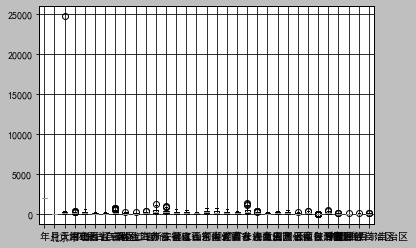

In [69]:
houseinv2.plot.box(grid=True)

容易看出有一个异常值点在北京市那里

想找到这个值具体是哪个，可以直接对北京的数据进行一个锁定

In [70]:
b=houseinv2['北京市'].ge(20000) ##.ge即greater or equal，大于给定值
b

2      False
3      False
4      False
5      False
6      False
       ...  
236    False
237    False
238    False
239    False
240    False
Name: 北京市, Length: 220, dtype: bool

In [71]:
houseinv2[b]

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
8,2019,6,24717.0,271.83,568.59,193.97,107.39,376.48,116.85,106.84,...,351.37,494.7,276.86,296.65,8.49,440.71,112.53,61.12,34.43,68.53


即可找出相应数据，可以直接修改。

In [72]:
houseinv2.loc[b,'北京市']=247.17

In [73]:
houseinv2

,年,月,北京市,天津市,河北省,山西省,内蒙古自治区,辽宁省,吉林省,黑龙江省,...,重庆市,四川省,贵州省,云南省,西藏自治区,陕西省,甘肃省,青海省,宁夏回族自治区,新疆维吾尔自治区
2,2019,12,171.43,142.45,191.60,109.25,12.95,50.11,39.97,32.68,...,285.91,397.15,127.23,343.00,3.95,281.94,57.29,7.93,14.64,31.25
3,2019,11,190.33,111.18,278.61,107.20,66.41,124.86,70.39,56.98,...,276.32,389.28,219.37,333.60,14.76,279.19,87.57,40.11,22.34,93.12
4,2019,10,192.06,120.02,288.08,120.29,76.49,184.05,123.38,75.77,...,268.78,434.32,190.85,260.84,14.84,291.46,96.10,39.04,30.50,130.12
5,2019,9,206.05,237.32,347.07,133.73,135.73,265.94,132.02,123.92,...,359.03,468.02,186.86,322.51,11.68,354.99,132.00,28.19,41.60,107.08
6,2019,8,173.17,157.91,332.31,124.50,111.02,207.80,138.65,75.08,...,288.46,426.79,214.50,289.73,10.07,258.98,95.24,27.24,32.67,94.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2000,6,22.04,8.71,9.96,4.95,3.35,20.56,7.58,10.10,...,7.15,10.68,3.25,3.57,0.00,4.67,2.48,0.80,1.23,5.29
237,2000,5,20.76,6.53,7.06,2.42,2.64,17.85,2.41,5.19,...,5.32,9.03,1.49,3.55,0.00,2.87,1.75,0.68,1.04,2.98
238,2000,4,20.24,6.52,5.27,1.55,1.07,8.89,0.98,2.61,...,3.78,8.53,1.72,2.39,0.00,3.12,0.71,0.65,0.77,3.35
239,2000,3,15.77,6.86,4.69,0.39,0.01,3.27,0.00,0.45,...,4.29,8.37,1.21,4.40,0.00,3.16,0.48,0.90,0.08,0.59


### 4.5 简单分析

In [74]:
houseinv2.set_index(['年','月'], inplace=True)
houseinv2

北京市     天津市     河北省     山西省  内蒙古自治区     辽宁省     吉林省    黑龙江省  \
年    月                                                                    
2019 12  171.43  142.45  191.60  109.25   12.95   50.11   39.97   32.68   
     11  190.33  111.18  278.61  107.20   66.41  124.86   70.39   56.98   
     10  192.06  120.02  288.08  120.29   76.49  184.05  123.38   75.77   
     9   206.05  237.32  347.07  133.73  135.73  265.94  132.02  123.92   
     8   173.17  157.91  332.31  124.50  111.02  207.80  138.65   75.08   
...         ...     ...     ...     ...     ...     ...     ...     ...   
2000 6    22.04    8.71    9.96    4.95    3.35   20.56    7.58   10.10   
     5    20.76    6.53    7.06    2.42    2.64   17.85    2.41    5.19   
     4    20.24    6.52    5.27    1.55    1.07    8.89    0.98    2.61   
     3    15.77    6.86    4.69    0.39    0.01    3.27    0.00    0.45   
     2    12.55    3.75    0.61    0.52    0.00    0.72    0.00    0.25   

            上海市     江苏省  ...     重庆市     四川省     贵州省     云南省  西藏自治区     陕西省  \
年    月                   ...                                                  
2019 12  249.35  629.71  ...  285.91  397.15  127.23  343.00   3.95  281.94   
     11  218.07  783.04  ...  276.32  389.28  219.37  333.60  14.76  279.19   
     10  196.29  791.58  ...  268.78  434.32  190.85  260.84  14.84  291.46   
     9   223.27  867.43  ...  359.03  468.02  186.86  322.51  11.68  354.99   
     8   200.91  780.44  ...  288.46  426.79  214.50  289.73  10.07  258.98   
...         ...     ...  ...     ...     ...     ...     ...    ...     ...   
2000 6    41.84   25.11  ...    7.15   10.68    3.25    3.57   0.00    4.67   
     5    24.34   21.74  ...    5.32    9.03    1.49    3.55   0.00    2.87   
     4    24.97   18.90  ...    3.78    8.53    1.72    2.39   0.00    3.12   
     3    31.77   17.76  ...    4.29    8.37    1.21    4.40   0.00    3.16   
     2    19.18   16.84  ...    6.08    6.01    1.63    4.92   0.00    1.73   

            甘肃省    青海省  宁夏回族自治区  新疆维吾尔自治区  
年    月                                     
2019 12   57.29   7.93    14.64     31.25  
     11   87.57  40.11    22.34     93.12  
     10   96.10  39.04    30.50    130.12  
     9   132.00  28.19    41.60    107.08  
     8    95.24  27.24    32.67     94.24  
...         ...    ...      ...       ...  
2000 6     2.48   0.80     1.23      5.29  
     5     1.75   0.68     1.04      2.98  
     4     0.71   0.65     0.77      3.35  
     3     0.48   0.90     0.08      0.59  
     2     0.02   0.00     0.00      0.00  

[220 rows x 31 columns]

array([[<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel='年,月'>],
       [<AxesSubplot:xlabel='年,月'>, <AxesSubplot:xlabel='年,月'>,
        <AxesSubplot:xlabel

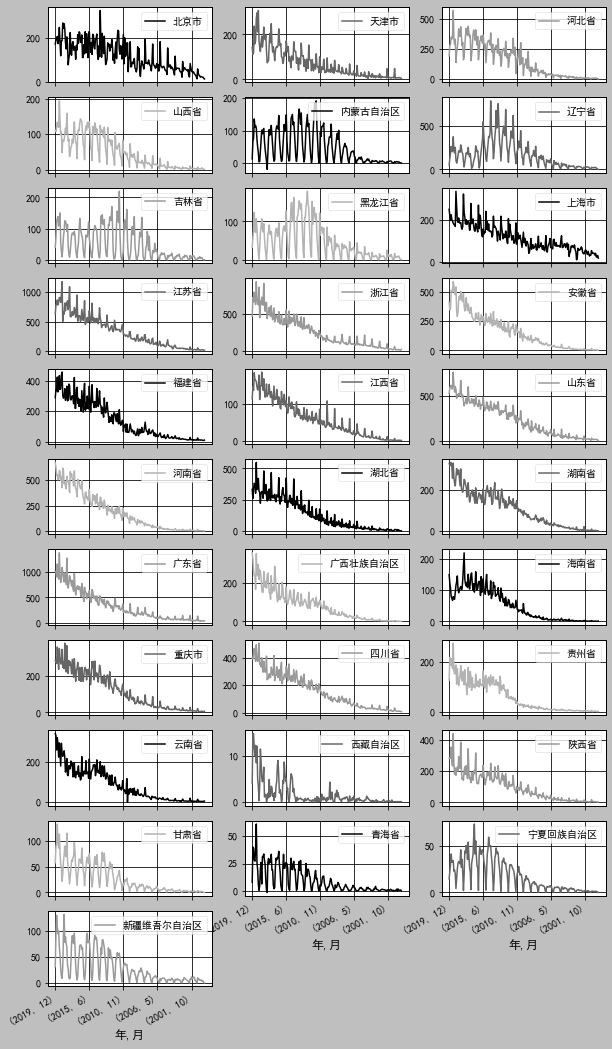

In [75]:
houseinv2.plot(subplots=True,layout=(11,3),figsize=(10,20))

可以看出月住宅投资额的周期性，且呈现指数增长。

## 五、总结

本节课介绍了如下内容：

1. matplotlib.pyplot提供的绘图风格模板
2. pandas的数据透视表使用pivot_table（默认功能是统计平均数）和交叉表crosstab（用于统计频数）
3. 在python中自建函数的功能
4. pandas的数据去重功能
5. pandas识别、去除、替换缺失值的功能